<h1 style="text-align: center;"><font color='green'>Prueba 1: Análisis de Sentimientos de Twitter</font></h1>

## <font color='green'>**Contexto**</font>

A continuación se presenta un problema clásico en el análisis de texto: *Extraer la polaridad de sentimiento asociado a un texto*. 

Para esto, utilizaremos una base de datos provenientes de CrowdFlower que se entrega como archivo adjunto para esta prueba bajo el nombre de `training_tweets.csv`. 

Para descargar los datos puede ejecutar el siguiente código:

`https://www.crowdflower.com/wp-content/uploads/2016/07/text_emotion.csv`

El objetivo general de esta prueba es alcanzar el mejor desempeño posible para clasificar si un tweet tiene una polaridad positiva o negativa en cuanto al sentimiento que expresa.

Para medir el desempeño, se evaluará con un conjunto de datos del cuál no tendrán acceso. De esta manera evitaremos que los modelos aprendan información sobre el conjunto de validación.

## <font color='green'>**Consideraciones**</font>
Nos interesa trabajar con dos tipos de emociones: positivas o negativas. Para ello deberá generar la recodificación de cada una de las clases en una de las dos emociones:

| Original | Recodificación |
|-----:|------------|
| worry | Negativa |
| happiness | Positiva |
| sadness | Negativa |
| love | Positiva |
| surprise | Positiva |
| fun | Positiva |
| relief | Positiva |
| hate | Negativa |
| empty | Negativa |
| enthusiasm | Positiva |
| boredom | Negativa |
| anger | Negativa |

Si el tweet está asignado como neutral, clasifíquelo aleatoriamente entre positivo o negativo.

## <font color='green'>**Hito 1:**</font>

#### **<font color='green'>Entendimiento del problema</font>**

El análisis de sentimientos en Twiter es un problema del campo de la clasificación, existe abundante evidencia en la literatura que busca dar respuesta a este problema.

En concreto el desafío consiste en generar una clasificación binaria de los Twits, determinando si estos son positivos o negativos, dado que no existe interés en identificar algún sentimeinto por sobre otro, nuestra métrica de desempeño será `accuracy` en caso de clases equilibradas, o `f1-score` considerando un eventual desequilibrio entre las clases, ponderando así el resultado de Precisión y Recall.

Para poder realizar el análisis, es necesario importar algunas librerias clásicas con las que trabajaremos, por ejemplo:
- Se importarán librerias de manipulación de datos como `pandas==1.1.5` y `numpy==1.19.5`
- librerías para realizar visualizaciones como `matplotlib==3.3.4` y `seaborn==0.11.2`
- librerías relacionadas con el modelamiento como `scikit-learn==0.24.2` junto con las métricas asociadas a la clasificación y separación de datos; y funciones asociadas a NLP como `CountVectorizer`

#### **<font color='green'>Propuesta metodológica</font>**

Para realizar el análisis, se procederá con la siguiente metodología de trabajo:

El trabajo comenzará con un análisis exploratorio será el análisis de datos perdidos, luego con un análisis exploratorio de los datos, identificando la estructura y extensión de la base de datos, la frecuencia de palabras, identificando aquellas más utilizadas en nuestro conjunto de tweets, analizaremos la extensión de carácteres de los tweets, el trabajo exploratorio también analizará la composición de la variable dependiente previo a su agrupación

El trabajo continuará con el preprocesamiento de los datos, lo cual nos permitirá limpiar y estructurar la base de datos de manera tal que podamos trabajar en ella, bajo las configuraciones exigidas por los algoritmos. En general algunas de las técnicas más habituales para los trabajos de procesamiento de lenguaje natural (NLP) son identificación de stopwords, procesos de Lematización, stemming y tokenización. En el desarrollo de este trabajo implmentaremos algunas de estas técnicas con la finalidad de aumentar la precisión de nuestros mododel. El trabajo continuará con la recodificación de los atributos de nuestra variable dependiente, para lo cual recodificaremos los distintos atributos que toma la variable sentimiento, con la finalidad de reducirlo a positivo o negativo, posteriormente esta columna será binarizada para poder trabajar con los modelos, de igual manera se eliminará la columna del ID del Twit junto con el autor de este, dado que esto no genera valor para nuestros modelos.

Finalmante con la data depurada, comenzaremos a desarrollar cada uno nuestros modelos,  posteriormente comparar sus resultados y definiremos los dos más efectivos en la identificación de los sentimientos de los tweets.

Como nos encontramos frente a un problema de clasificación, debemos ocupar métricas que estén asociadas a problemas de clasificación. Ahora, dependiendo que tan balanceado estén las categorías de nuestro target, es que ocuparemos diferentes métricas para evaluar nuestro modelo y predicciones (Todas estas métricas se obtendrán de la librería `sklearn`):
- Si nuestra variable objetivo no presenta problemas de desbalanceo, ocuparemos las siguientes métricas:
    - `accuracy` 
    - `precision`
- Si nuestra variable objetivo presenta problemas de desbalanceo, ocuparemos las siguientes métricas
    - `precision`
    - `recall`
    - `f1-score`

#### **<font color='green'>Modelos y grillas a implementar</font>**

Por lo mencionado en los enunciado, debemos realizar al menos 5 modelos para la predicción de los sentimientos. Dado que nos encontramos ante un problema de clasificación, proponemos los siguientes modelos a implementar:

- `LogisticRegression`: 
    - *penalty*: l1, l2, elasticnet, None
    - *C*: [0.01, 1, 100]
- `MultinomialNB`: 
    - *alpha*: [0.0001, 0.1, 10]
- `RandomForestClassifier`:
    - *max_features*: None, log2, sqrt
    - *n_estimators*: Evaluar entre 20 y 1000 en pasos de 50
- `SVC`:
    - *C*: [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    - *gamma*: [0.0001, 0.001, 0.01, 0.1, 1, 10]
    - *cv*: 10
- `GradientBoostingClassifier`:
    - *learning_rate*: [0.01, 0.1, 0.5],
    - *n_estimators*: [50, 100, 500, 1000, 2000],
    - *subsample*: [0.1,0.5,0.9]

además, en caso de ameritarlo, se ocupará el parámetro `class_weight` si tenemos nuestro dataset desbalanceado.

#### **<font color='green'>Estudio del vector objetivo</font>**

Para el estudio de la variable objetivo, primero cargaremos las librerias necesarias y el dataset. Despues nos centraremos en el analisis de la variable `sentiment` que es nuestro vector objetivo que posteriormente debemos convertirla en una variable binaria 0 y 1:

In [1]:
# Importamos las librerías clasicas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import random
import warnings
import re
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from funciones import porcentaje_null, graf_word_cloud, plot_classification_report

# Descargamos los stopwords, wordnet y omw necesarias para la nube de palabras
nltk.download('stopwords');

# Para filtrar los warnings
warnings.filterwarnings('ignore')

# Cargamos los datos de entrenamiento y de test
df = pd.read_csv('training_tweets.csv').drop(columns='Unnamed: 0')
df

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\RodrigoBarraza\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\RodrigoBarraza\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RodrigoBarraza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,content,sentiment
0,Happy Mama's day to all mothers,love
1,@LysdelTellez I am lost. Please help me find a...,worry
2,"@BoomKatt yes yes I AM, networking whore to th...",happiness
3,you@snapplynn Wish that would have been your t...,neutral
4,now i am doing the MicroEconomics project iha...,worry
...,...,...
29995,I do not want to work tomorrow!,sadness
29996,@KandyBee we shuld do a dance like that its s...,fun
29997,"Photo: Got my prints a few days ago, ready for...",happiness
29998,@tove_liden Thanks for the follow Tove!,fun


neutral       0.215033
worry         0.211233
happiness     0.131733
sadness       0.128967
love          0.096933
surprise      0.053967
fun           0.044367
relief        0.038600
hate          0.032500
empty         0.020567
enthusiasm    0.018633
boredom       0.004500
anger         0.002967
Name: sentiment, dtype: float64

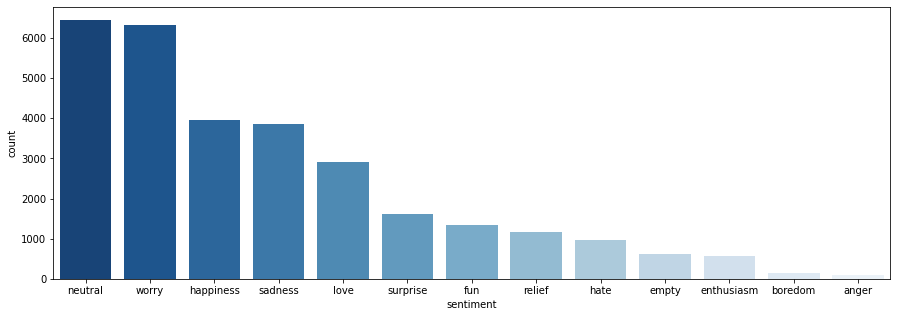

In [2]:
# Revisamos la distribución de la variable objetivo

plt.figure(figsize=(15,5))

# Graficamos la cantidad de datos por categoria
sns.countplot(data=df, x='sentiment', palette = 'Blues_r', order = df['sentiment'].value_counts().index)

# Revisamos la proporcion entre estas categorias
df['sentiment'].value_counts(normalize=True)

Observamos que el sentimiento más frecuente es el `neutral`, lo cual no es ni un sentimiento positivo ni negativo, en segundo lugar vemos que practicamente con la misma frecuencia se encuentra el sentimiento `worry`, el cual es un sentimiento negativo, por ultimo, en el 3er lugar se encuentra el sentimiento `happiness` el cual es un sentimiento positivo.

#### **<font color='green'>Estudio de datos nulos</font>**

Para ver la cantidad de nulos en el dataset, llamaremos a la función creada llamada `porcentaje_null` la cual reporta la cantidad del datos perdidos por columna y el porcentaje que representa

In [3]:
porcentaje_null(df)

           N_NaN  Porcentaje
content        0         0.0
sentiment      0         0.0


Claramente, no hay registros nulos en nuestro set de datos, por lo que no es necesario eliminar ni filas ni columnas ni reemplazar estos valores.

#### **<font color='green'>Recodificación del vector objetivo</font>**

Como nos encontramos en un problema de clasificación binaria, debemos recodificar las variables como sentimineto `positivo` o `negativo`, por lo cual, con la lista entregada en el desafio, realizamos el reemplazo segun corresponda para cada palabra:

In [4]:
# Procedemos a realizar la recodificación de la variable objetivo sentiment

# Listamos los sentimientos que corresponden a emociones negativas o positivas
negativa = ["worry","sadness","hate","empty","boredom","anger"]
positiva = ["happiness","love","surprise","fun","relief","enthusiasm"]

# Sustituimos dichos sentimientos
df['sentiment'] = df['sentiment'].replace(negativa,'negativa')
df['sentiment'] = df['sentiment'].replace(positiva,'positiva')

# Mostramos la distribución sin randomizar los sentimientos nuetros
df['sentiment'].value_counts()

negativa    12022
positiva    11527
neutral      6451
Name: sentiment, dtype: int64

In [5]:
# Para las emociones neutras, las clasificamos de forma aleatoria

random.seed(13)
df['sentiment'] = df['sentiment'].apply(lambda x: x.replace('neutral',random.choice(['positiva','negativa'])))

# Mostramos como quedó la distribución de esta
df['sentiment'].value_counts()

negativa    15200
positiva    14800
Name: sentiment, dtype: int64

Al realizar la recodificación, vemos como quedo bastante equilibrado nuestra variable objetivo ya que practicamente tienen la misma proporción. Por último, le damos la recodificación adecuada dejandola con los valores 1 y 0 para valores positivos y negativos respectivamente.

In [6]:
# Recodificamos en 0 y 1

df['sentiment'] = df['sentiment'].replace(['positiva','negativa'],[1,0])
df['sentiment'].value_counts()

0    15200
1    14800
Name: sentiment, dtype: int64

Nota: Como tenemos las clases equilibras y no hay una clase con mayor interés que la otra, es que nuestra métrica de desempeño será `accuracy`, complementando esta con la métrica `f1-score`. 

## <font color='green'>**Hito 2:**</font>

#### **<font color='green'>Ingeniería de atributos</font>**

lo que primero haremos será dejar el texto completo en minuscula y eliminar los caracteres raros de la variable `content`:

In [7]:
# Convertimos todas las palabras en minuscula
df['content_clean'] = df['content'].apply(lambda x: x.lower())

# Remueve números y caracteres especiales
df['content_clean'] = df['content_clean'].apply(lambda x: re.sub('[^a-zA-Z \n\.]', '', x)) 

Ahora, llamaremos a la función creada `graf_word_cloud`, la cual realiza una nube de palabras para un variable que contenga el texto con las palabras a gráficar, realizando la tokenizacion, lemmatizacion y la eliminacion de los stopwords correspondientes; además, deja la cadena totalmente limpia en una nueva variable:

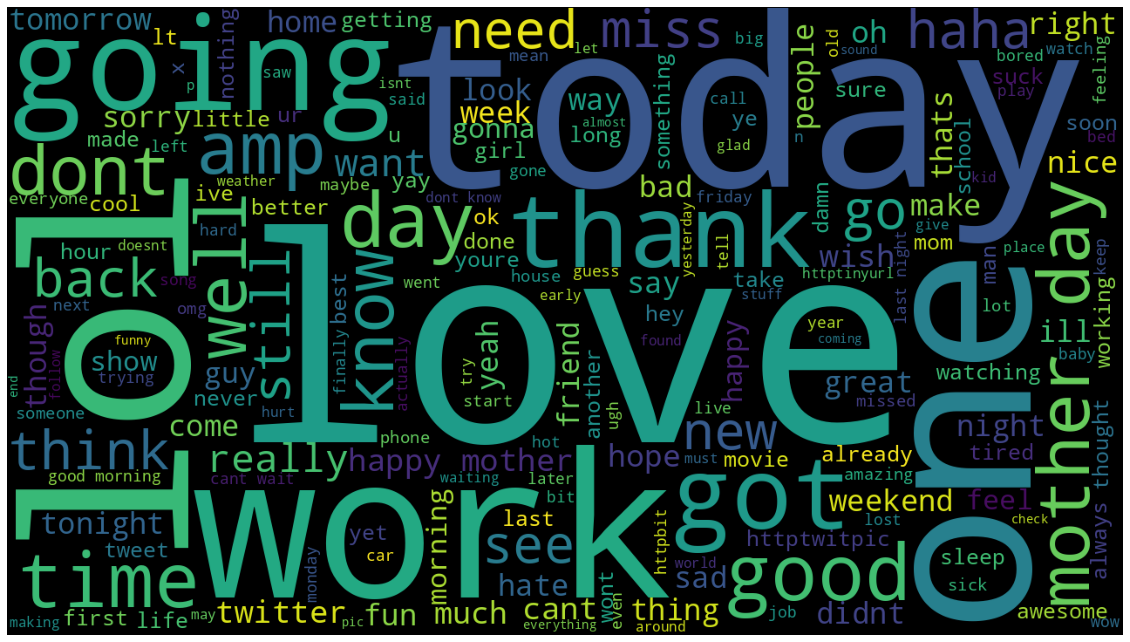

In [8]:
# Realizamos el grafico de las nubes de palabras
graf_word_cloud(df, 'content_clean')

Se puede observar que las palabras más frecuentes/utilizadas son `love` y `today`, en donde la primera claramente está más asociada a un sentimiento positivo, mientras que today podría estar mas relacionada a un sentimiento neutral.

Por otro lado, veremos la distribución del largo de los textos de la variable `content`

137    460
136    389
47     356
49     339
45     335
135    326
48     324
52     313
36     310
46     309
Name: len, dtype: int64

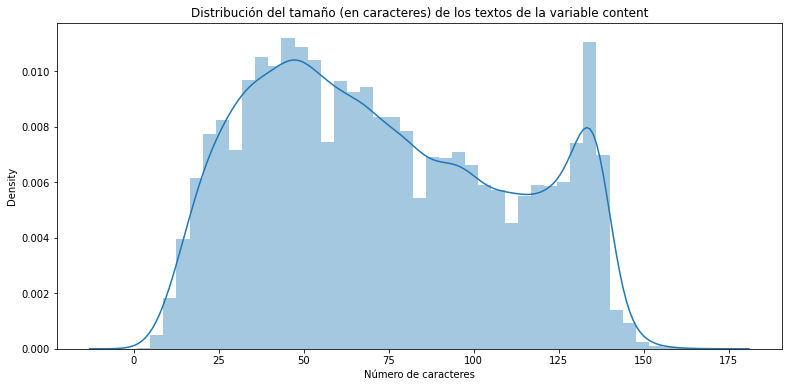

In [9]:
# Definimos una nueva columna con el largo de cada texto
df['len'] = df['content'].apply(len)

# Realizamos un histograma para analizar la distribución de la extensión de los tweets
plt.figure(figsize=(13,6))
sns.distplot(df['len'], axlabel="Número de caracteres").set_title('Distribución del tamaño (en caracteres) de los textos de la variable content');

# Vemos los 10 primeros valores maximos
df['len'].value_counts()[:10]

Se observa que la mayoria de los textos, son tweet que tienen entre los 35-50 caracteres y 135-137 caracteres.

Ahora, antes de crear la bolsa de palabras, le damos un vistazo al dataset:

In [10]:
df

,content,sentiment,content_clean,len
0,Happy Mama's day to all mothers,1,happy mama day mother,31
1,@LysdelTellez I am lost. Please help me find a...,0,lysdeltellez lost please help find good home,57
2,"@BoomKatt yes yes I AM, networking whore to th...",1,boomkatt yes yes networking whore fullest girl...,93
3,you@snapplynn Wish that would have been your t...,1,yousnapplynn wish would tweet followed,73
4,now i am doing the MicroEconomics project iha...,0,microeconomics project ihate subject amp besid...,133
...,...,...,...,...
29995,I do not want to work tomorrow!,0,want work tomorrow,32
29996,@KandyBee we shuld do a dance like that its s...,1,kandybee shuld dance like seriously best thing...,90
29997,"Photo: Got my prints a few days ago, ready for...",1,photo got print day ago ready norskart exhibit...,99
29998,@tove_liden Thanks for the follow Tove!,1,toveliden thanks follow tove,39


Ya tenemos en nuestro dataset la variable `content_clean`, a la cual le hemos aplicado las técnicas de lematización, Stopword y limpiado de todos los caracteres raros, lo cual nos permitirá ser más efectivos en nuestras prediciones. De esta manera, para los modelos que dasarrollaremos utlizaremos este columna en remplazo de la variable `content`. Además, aplicamos la clase para extraer las 200 palabras más repetidas en toda la base de datos:

In [11]:
# Instanciamos el objeto
count_vectorizer = CountVectorizer(stop_words='english')

# Implementamos los pasos fit y transform
count_vectorizer_fit = count_vectorizer.fit_transform(df["content_clean"])

# Extraemos tokens (palabras)
words = count_vectorizer.get_feature_names()

# extraemos frecuencia
#words_freq = count_vectorizer_fit.toarray().sum(axis=0)

# Se crea un DataFrame para facilitar la visualización
#words_freq_df = pd.DataFrame([words, words_freq]).T.sort_values(by=[1], ascending=False)
#words_freq_df.columns = ["Palabra", "Frecuencia"]
#words_freq_df.T

#### **<font color='green'>Modelamiento</font>**

En primera instancia, separamos el set de datos para entrenamiento y testeo

In [12]:
# Utiliza esta celda para generar las muestras

X_train, X_test, y_train, y_test = train_test_split(count_vectorizer_fit, df['sentiment'], test_size=0.3, random_state=42)

luego, procederemos a implementar los modelos propuestos sin realizar ningun ajuste de hiperparámetros:

In [13]:
# Modelo Logistico
ml_logit = LogisticRegression(random_state=42).fit(X_train, y_train)

# Modelo Naive Bayes
ml_nb = MultinomialNB().fit(X_train, y_train)

# Modelo Random Forest
ml_rf = RandomForestClassifier(random_state=42).fit(X_train, y_train)

# Modelo Support Vector Machine
ml_svc = SVC(random_state=42).fit(X_train, y_train)

# Modelo Gradient boosting
ml_gb = GradientBoostingClassifier(random_state=42).fit(X_train, y_train)

Ahora se realizará el modelamiento pero con los hiperparámetros propuestos:

- Modelo Logístico:

In [14]:
# Inicializamos el modelo
ml_logit_hp = LogisticRegression(random_state=42)

# Definimos los hiperparámetros
hiper_params = {
    'penalty': ['l1','l2','elasticnet', None],
    'C': [0.01, 1, 10, 100]
}

# Definimos la grilla
grilla_logit = GridSearchCV(ml_logit_hp, param_grid = hiper_params)

# Realizamos el fit
grilla_logit.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.01, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', None]})

In [15]:
# Vemos los mejores parámetros de la grilla

print(f'Mejores hiperparámetros: {grilla_logit.best_estimator_}')
print(f'Mejor puntaje: {grilla_logit.best_score_}')

Mejores hiperparámetros: LogisticRegression(C=1, random_state=42)
Mejor puntaje: 0.6622380952380953


- Modelo Naive Bayes

In [16]:
# Inicializamos el modelo
ml_nb_hp = MultinomialNB()

# Definimos los hiperparámetros
hiper_params = {
    'alpha': [0.0001, 0.1, 10],
}

# Definimos la grilla
grilla_nb = GridSearchCV(ml_nb_hp, param_grid = hiper_params)

# Realizamos el fit
grilla_nb.fit(X_train,y_train)

GridSearchCV(estimator=MultinomialNB(), param_grid={'alpha': [0.0001, 0.1, 10]})

In [17]:
# Vemos los mejores parámetros de la grilla

print(f'Mejores hiperparámetros: {grilla_nb.best_estimator_}')
print(f'Mejor puntaje: {grilla_nb.best_score_}')

Mejores hiperparámetros: MultinomialNB(alpha=10)
Mejor puntaje: 0.6754761904761903


- Modelo RandomForest

In [18]:
# Inicializamos el modelo
ml_rf_hp = RandomForestClassifier(random_state=42)

# Definimos los hiperparámetros
hiper_params = {
    'max_features': [None, 'log2', 'sqrt'],
    'n_estimators': range(10, 100, 10)
}

# Definimos la grilla
grilla_rf = GridSearchCV(ml_rf_hp, param_grid = hiper_params, cv=2)

# Realizamos el fit
grilla_rf.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_features': [None, 'log2', 'sqrt'],
                         'n_estimators': range(10, 100, 10)})

In [19]:
# Vemos los mejores parámetros de la grilla

print(f'Mejores hiperparámetros: {grilla_rf.best_estimator_}')
print(f'Mejor puntaje: {grilla_rf.best_score_}')

Mejores hiperparámetros: RandomForestClassifier(max_features='sqrt', n_estimators=90, random_state=42)
Mejor puntaje: 0.6515714285714286


- Modelo Super Vector Machine

In [20]:
# Inicializamos el modelo
ml_svc_hp = SVC(random_state=42)

# Definimos los hiperparámetros
hiper_params = {
    'C': [0.001, 0.1, 1, 100],
    'gamma': [0.0001, 0.01, 1, 10],
}

# Definimos la grilla
grilla_svc = GridSearchCV(ml_svc_hp, param_grid = hiper_params, cv=2)

# Realizamos el fit
grilla_svc.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=SVC(random_state=42),
             param_grid={'C': [0.001, 0.1, 1, 100],
                         'gamma': [0.0001, 0.01, 1, 10]})

In [21]:
# Vemos los mejores parámetros de la grilla

print(f'Mejores hiperparámetros: {grilla_svc.best_estimator_}')
print(f'Mejor puntaje: {grilla_svc.best_score_}')

Mejores hiperparámetros: SVC(C=100, gamma=0.0001, random_state=42)
Mejor puntaje: 0.6492857142857142


- Modelo Gradient Bossting

In [22]:
# Inicializamos el modelo
ml_gb_hp = GradientBoostingClassifier(random_state=42)

# Definimos los hiperparámetros
hiper_params = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 200, 500],
    'subsample': [0.1, 0.5, 0.9]
}

# Definimos la grilla
grilla_gb = GridSearchCV(ml_gb_hp, param_grid = hiper_params, cv=2)

# Realizamos el fit
grilla_gb.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'n_estimators': [50, 200, 500],
                         'subsample': [0.1, 0.5, 0.9]})

In [23]:
# Vemos los mejores parámetros de la grilla

print(f'Mejores hiperparámetros: {grilla_gb.best_estimator_}')
print(f'Mejor puntaje: {grilla_gb.best_score_}')

Mejores hiperparámetros: GradientBoostingClassifier(n_estimators=500, random_state=42, subsample=0.5)
Mejor puntaje: 0.659


#### **<font color='green'>Evaluación del modelamiento</font>**

Ahora, para evaluar los modelos, se escojeran los modelos sin los hiperparámetros, y se seleccionaran los mejores modelos de las grillas realizadas y revisarán sus métricas. Por lo tanto, revisaremos 10 modelos: 2 por cada modelo, contemplando sin hiperparámetros y el mejor obtenido por la grilla.

In [24]:
# Se crea un diccionario con los modelos a competir
estimators = [
    ('Logistic s/Hiperparámetros', ml_logit),
    ('Logistic c/Hiperparámetros', grilla_logit.best_estimator_),
    ('Naives Bayes s/Hiperparámetros', ml_nb),
    ('Naives Bayes c/Hiperparámetros', grilla_nb.best_estimator_),
    ('RanfomForest s/Hiperparámetros', ml_rf),
    ('RanfomForest c/Hiperparámetros', grilla_rf.best_estimator_),
    ('SVC s/Hiperparámetros', ml_svc),
    ('SVC c/Hiperparámetros', grilla_svc.best_estimator_),
    ('GradientBoosting s/Hiperparámetros', ml_gb),
    ('GradientBoosting c/Hiperparámetros', grilla_gb.best_estimator_)                     
]

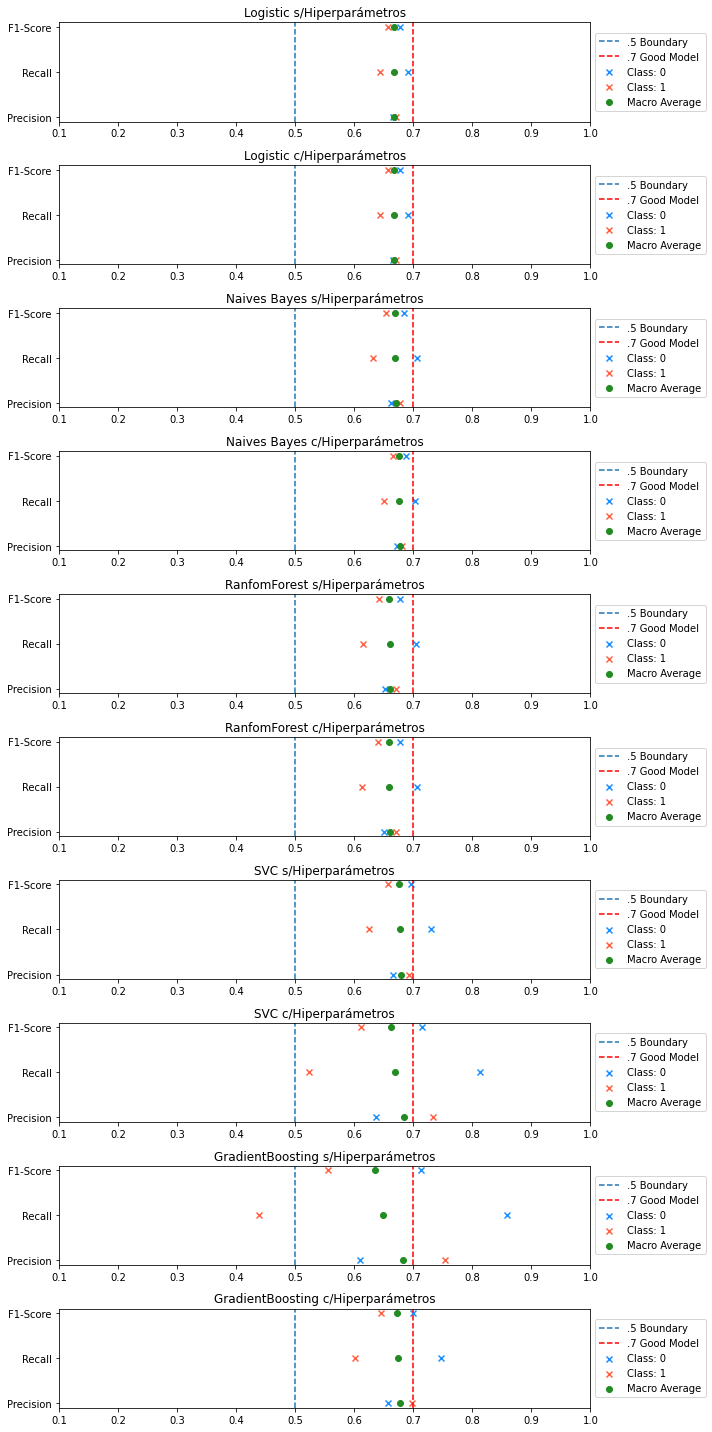

In [29]:
# Graficamos los score de los modelos con la función plot_classification_report
plt.figure(figsize=(10, 20))
for index, value in enumerate(estimators):
    plt.subplot(len(estimators), 1, index + 1)
    plt.title(value[0])
    class_pred = value[1].predict(X_test)
    plot_classification_report(y_test, class_pred)
    plt.axvline(.5, label='.5 Boundary', linestyle='--')
    plt.axvline(.7, label='.7 Good Model', linestyle='--', color='Red')
    plt.xlim((0.1, 1.0))
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

A simple vista, parece que las mejores métricas se obtienen de los modelos NaiveBayes con hipeparámetros ajustados y SVC sin hiperparámetros ajustados. Se echará un vistaso a estos modelos:

In [33]:
# Obtenemos las prédicciones de ambos modelos escogidos
y_pred_svc = ml_svc.predict(X_test)
y_pred_nbhp= grilla_nb.best_estimator_.predict(X_test)

In [34]:
# Mostramos las métricas del modelo SVC
print(f'''Modelo SVC sin hiperparámetros: 
{classification_report(y_test, y_pred_svc)}''')

# Mostramos las métricas del modelo NaiveBayes
print(f'''Modelo NaiveBayes con hiperparámetros: 
{classification_report(y_test, y_pred_nbhp)}''')

Modelo SVC sin hiperparámetros: 
              precision    recall  f1-score   support

           0       0.67      0.73      0.70      4551
           1       0.69      0.62      0.66      4449

    accuracy                           0.68      9000
   macro avg       0.68      0.68      0.68      9000
weighted avg       0.68      0.68      0.68      9000

Modelo NaiveBayes con hiperparámetros: 
              precision    recall  f1-score   support

           0       0.67      0.70      0.69      4551
           1       0.68      0.65      0.67      4449

    accuracy                           0.68      9000
   macro avg       0.68      0.68      0.68      9000
weighted avg       0.68      0.68      0.68      9000



Si bien, estos son los mejores modelos en cuanto a `Accuracy` y `Precision`, aun no son del todo buenas. Una forma en la que podriamos mejorarlo, es no considerando las clases `Neutral` en la columna sentiment, ya que al ser un sentimiento neutro, no es ni positivo ni negativo, por lo que puede estar afectando a nuestras predicciones confundiendo al modelo, por lo que se optará por filtrar del dataset estas categorias y volver a modelar para revisar si mejoran la métricas.